<a href="https://colab.research.google.com/github/AdityaIngale29/SOC/blob/main/Loan_Prediction_Logistic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
from google.colab import files

uploaded=files.upload()

Saving madfhantr.csv to madfhantr.csv


In [175]:
df=pd.read_csv(io.BytesIO(uploaded['madfhantr.csv']))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


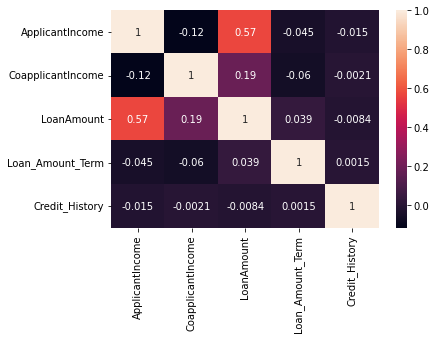

In [176]:
sns.heatmap(df.corr(),annot=True)

In [177]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [178]:
df=df.dropna()
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


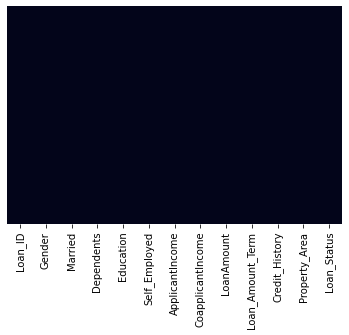

In [179]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [180]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [181]:
df.drop('Loan_ID',axis=1,inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [182]:
df['Dependents']=df['Dependents'].replace(['3+'],['3'])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [183]:
gn=pd.get_dummies(df['Gender'],drop_first=True)
gn

,Male
1,1
2,1
3,1
4,1
5,1
...,...
609,0
610,1
611,1
612,1


In [184]:
mr=pd.get_dummies(df['Married'],drop_first=True)
mr=mr.rename(columns={'Yes':'MR-Yes'})
mr

,MR-Yes
1,1
2,1
3,1
4,0
5,1
...,...
609,0
610,1
611,1
612,1


In [185]:
edu=pd.get_dummies(df['Education'],drop_first=True)
edu

,Not Graduate
1,0
2,0
3,1
4,0
5,0
...,...
609,0
610,0
611,0
612,0


In [186]:
sf=pd.get_dummies(df['Self_Employed'],drop_first=True)
sf=sf.rename(columns={"Yes":"SFE-Yes"})
sf

,SFE-Yes
1,0
2,1
3,0
4,0
5,1
...,...
609,0
610,0
611,0
612,0


In [187]:
pa=pd.get_dummies(df['Property_Area'],drop_first=True)
pa

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [188]:
ls=pd.get_dummies(df['Loan_Status'],drop_first=True)
ls

,Y
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


In [189]:
df=pd.concat([df,gn,mr,edu,sf,pa,ls],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,MR-Yes,Not Graduate,SFE-Yes,Semiurban,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,1,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,0,0,1
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,0,0,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,0,0,0,1,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,0,0,0,1,1


In [190]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'],axis=1,inplace=True)
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,MR-Yes,Not Graduate,SFE-Yes,Semiurban,Urban,Y
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
5,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1


In [194]:
X=df.drop('Y',axis=1)
y=df['Y']

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
model=LogisticRegression()

In [199]:
model.fit(X_train,y_train)

LogisticRegression()

In [200]:
pred=model.predict(X_test)

In [201]:
from sklearn.metrics import classification_report

In [203]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.18      0.31        11\n           1       0.59      1.00      0.74        13\n\n    accuracy                           0.62        24\n   macro avg       0.80      0.59      0.53        24\nweighted avg       0.78      0.62      0.54        24\n'

In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
confusion_matrix(y_test,pred)

array([[ 2,  9],
       [ 0, 13]])

In [206]:
from sklearn.metrics import accuracy_score

In [208]:
accuracy_score(y_test,pred)*100

62.5

# Accuracy has slightly improved than Linear Regression